In [63]:
import os
import pandas as pd
import numpy as np
from time import time

#from helper import parse_fix_matrix, view_alignment
from Bio import AlignIO, SeqIO

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.manifold import TSNE, MDS
from sklearn.decomposition import PCA


from multiprocessing import Pool

#import pymol2

import pickle
from Bio.PDB import PDBParser, Superimposer, StructureAlignment
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import HDBSCAN

#from numba import jit

In [3]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 20

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=BIGGER_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Global structure alignment

In [4]:
# Load Global structure_alignment_df

with open("results/global_structure_alignment_plddt70_23_08_12.pkl", "rb") as f:
    dict_structure_dist = pickle.load(f)

# Small_cap_domain



with open("seq_dist_Global_23_08_03.pkl", "rb") as file_writer: 
    seq_dict = pickle.load(file_writer)


    


/home/sandra/anaconda3/envs/CbTan/lib/python3.11/site-packages/sklearn/manifold/_mds.py:298: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


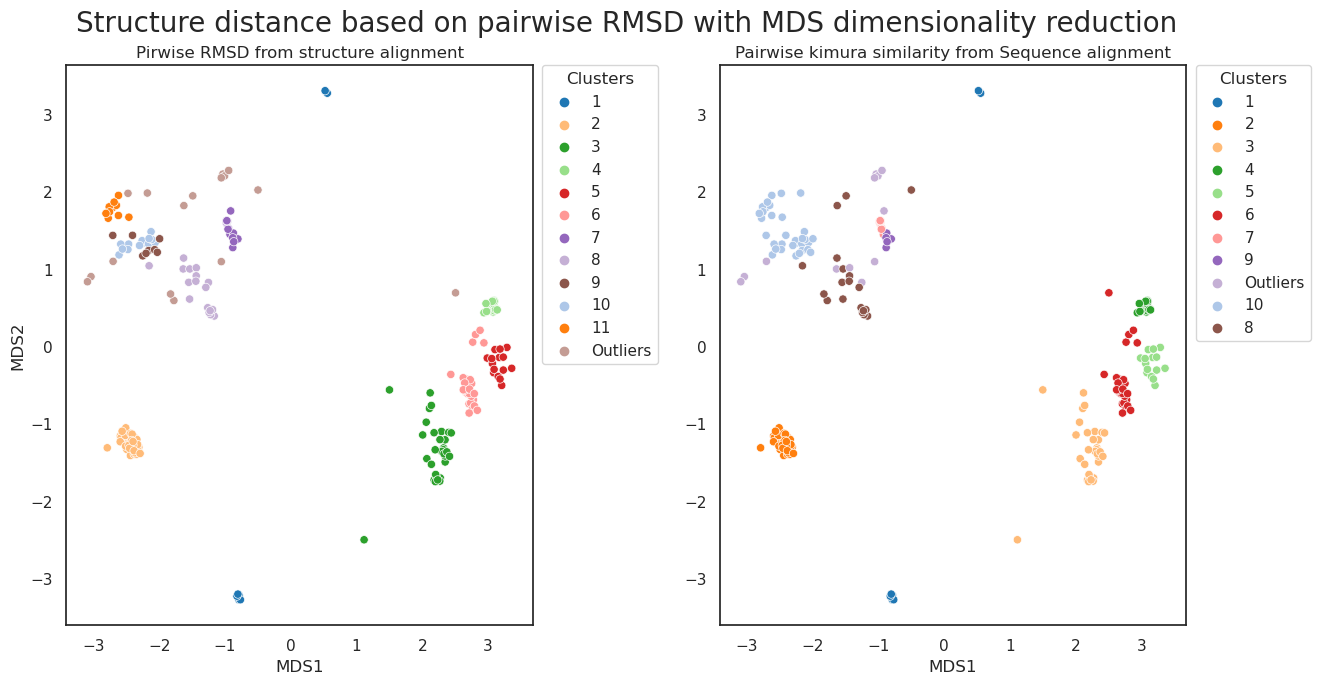

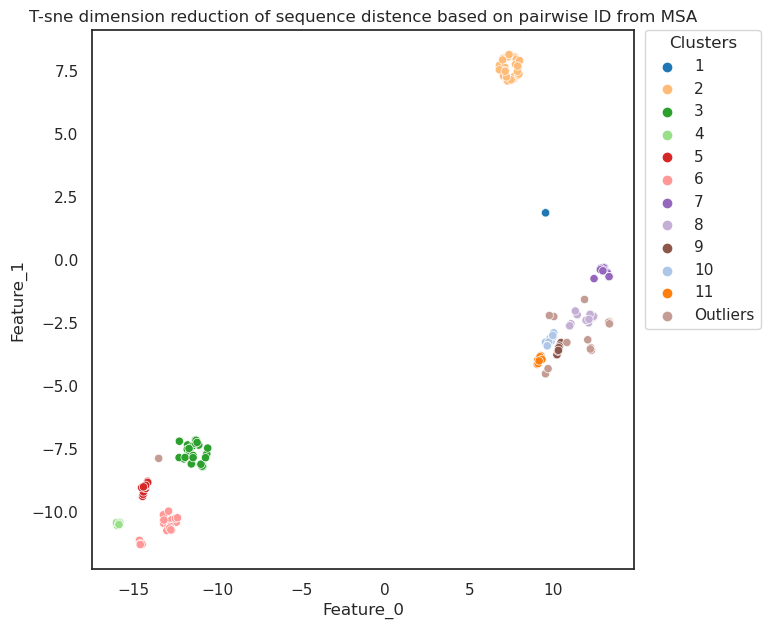

In [104]:
#kmeans_seq = KMeans(n_clusters=4, random_state=0).fit(seq_dict["vec"])
def convert(vec):
    return vec.astype(float)

#kmeans_seq = DBSCAN(eps=0.5, min_samples=5, metric = "precomputed").fit(list(map(convert, seq_dict["vec"])))
kmeans_seq = HDBSCAN(min_cluster_size = 8, min_samples=3, metric = "precomputed").fit(list(map(convert, seq_dict["vec"])))


dict_labels_30 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}
dict_labels_50 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}
dict_labels_70 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10", 10:"11"}
dict_labels_90 = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}

dict_key_structure_sequence_30 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"4", "4":"2", "5":"6", "6":"3", "7":"9", "8":"8", "9":"7", "10":"10"}
dict_key_structure_sequence_50 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"4", "4":"2", "5":"6", "6":"3", "7":"9", "8":"8", "9":"7", "10":"10"} # Constructed from structure cluster mapping


dict_key_structure_sequence_70 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"3", "4":"2", "5":"6", "6":"4", "7":"7", "8":"9", "9":"8", "10":"10", "11":"11"}



dict_key_structure_sequence_90 =  {"Outliers":"Outliers", "1":"5", "2":"1", "3":"4", "4":"2", "5":"6", "6":"3", "7":"9", "8":"8", "9":"7", "10":"10"}

order_30 = [0,2,3,4,5,6,1]
order_50 = [0,2,3,4,5,6,7,8,9,1,10]
order_70 = [0,3,4,5,6,7,8,9,10,1,2,11] #[0,2,3,4,5,6,7,8,9,1,10,2]
order_90 = [0,2,3,4,5,6,7,8,9,1,10]

order = order_70

#l = [dict_key_structure_sequence_30[dict_labels_30[i]] for i in kmeans_seq.labels_]
#l = [dict_key_structure_sequence_50[dict_labels_50[i]] for i in kmeans_seq.labels_]
l = [dict_key_structure_sequence_70[dict_labels_70[i]] for i in kmeans_seq.labels_]
#l = [dict_key_structure_sequence_90[dict_labels_90[i]] for i in kmeans_seq.labels_]


seq_id_label_map = {_id.split("_")[0]:label for _id, label in zip(seq_dict["id"],l)}



size = len(dict_structure_dist.keys()) #256

arr = np.zeros((size,size))
arr_1 = np.zeros((size,))
struct_dict={"id":[], "dist":[]}

n_clusters=3

for idx_out, rec_outer in enumerate(dict_structure_dist.items()):
    arr_1=np.zeros((size,))
    for idx_in, rec_inner in enumerate(rec_outer[1].items()):
        arr[idx_out, idx_in] = rec_inner[1]
        arr_1[idx_in] = rec_inner[1]
    struct_dict["id"].append(rec_outer[0])
    struct_dict["dist"].append(arr_1)
#kmeans = AgglomerativeClustering(n_clusters=None, affinity="precomputed", linkage = 'complete', distance_threshold=15).fit(arr)
#kmeans = KMeans(n_clusters=n_clusters, random_state=1).fit(arr)
#kmeans = DBSCAN(eps=1, min_samples=5, metric = "precomputed").fit(arr)
kmeans = HDBSCAN(min_cluster_size = 8, min_samples=3, metric = "precomputed").fit(arr)
#dict_labels = {-1:"Outliers", 0:"1", 1:"2", 2:"3", 3:"4", 4:"5", 5:"6", 6:"7", 7:"8", 8:"9", 9:"10"}

struct_cluster_label = [dict_labels_70[i] for i in kmeans.labels_]

#struct_cluster_label = kmeans.labels_

pca = MDS(n_components=2, metric= True, dissimilarity = "precomputed", n_init = 4, max_iter=300, eps = 1e-3)

X_embedded_pca = pca.fit_transform(arr)


arr_label_maped_seq_struct = []
for rec in struct_dict["id"]:
    #try:
    arr_label_maped_seq_struct.append(seq_id_label_map[rec.split(".")[0].split("_")[0]])
   # except:
    #    arr_label_maped_seq_struct.append(9)
        #print(rec)
#arr_label_maped_seq_struct = [ seq_id_label_map[_id.split("_")[0]] for _id in struct_dict["id"]]
struct_dict["seq_cluster_label"] = arr_label_maped_seq_struct
struct_dict["struct_cluster_label"] = struct_cluster_label
struct_dict = pd.DataFrame(struct_dict)

def pc_split(vec):
    #pcs = pca.transform([vec])
    return vec[0], vec[1]

struct_dict[f"PC 1"], struct_dict[f"PC 2"] = zip(*X_embedded_pca)#.map(pc_split))


f, ax = plt.subplots(1,2,figsize=[14,7])
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.9,
                    wspace=0.4,
                    hspace=0.4)

sns.set_theme(style="white")

# Load the example mpg dataset
mpg = sns.load_dataset("mpg")
sns.scatterplot(data=struct_dict.sort_values(by="struct_cluster_label"), x=f"PC 1", y=f"PC 2", #hue="origin", size="weight",
            alpha=1, palette="tab20", ax=ax[0], hue="struct_cluster_label")
ax[0].set_title("Pirwise RMSD from structure alignment")
ax[0].set_xlabel("MDS1")
ax[0].set_ylabel("MDS2")
handles, labels = ax[0].get_legend_handles_labels()


ax[0].legend([handles[idx] for idx in order],[labels[idx] for idx in order],title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)



sns.scatterplot(data=struct_dict.sort_values(by="struct_cluster_label"), x=f"PC 1", y=f"PC 2", #hue="origin", size="weight",
            alpha=1, palette="tab20", ax=ax[1], hue="seq_cluster_label")
ax[1].set_title("Pairwise kimura similarity from Sequence alignment")
ax[1].set_xlabel("MDS1")
ax[1].set_ylabel("")
#ax[1].set_title("Structure distence based on pairwise RMSD from CE structure alignment")
f.suptitle("Structure distance based on pairwise RMSD with MDS dimensionality reduction")

handles, labels = ax[1].get_legend_handles_labels()
#print(labels)

order = order_50
ax[1].legend([handles[idx] for idx in order[:11]],[labels[idx] for idx in order[:11]],title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig("results/img/struct_seq_dist_MDS.png")
#f.savefig("struct_dist_rmsd.png")
plt.show()


X_embedded_tsne = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=50, metric="precomputed").fit_transform(arr)
#kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(arr)

# make_dict

data_t_sne = {"Feature_0":[], "Feature_1":[]}
for x in X_embedded_tsne:
    data_t_sne["Feature_0"].append(x[0])
    data_t_sne["Feature_1"].append(x[1])

data_t_sne["label"]=struct_cluster_label
data_t_sne = pd.DataFrame(data_t_sne)
f, ax = plt.subplots(figsize=[7,7])

sns.set_theme(style="white")

sns.scatterplot(data=data_t_sne.sort_values(by="label"), x="Feature_0", y="Feature_1", #hue="origin", size="weight",
            alpha=1, palette="tab20", ax=ax, hue="label")
ax.set_title("T-sne dimension reduction of sequence distence based on pairwise ID from MSA")
handles, labels = ax.get_legend_handles_labels()
ax.legend([handles[idx] for idx in order_70],[labels[idx] for idx in order_70],title='Clusters', bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

plt.savefig("results/img/struct_dist_TSNE.png", bbox_inches="tight")


plt.show()

## Adding cap classifications

caps are located at three positions in the structures all taken from three representations


In [64]:
def lable_maker_12000(x):
    if x in ["TanCb1", "TanCb2", "TanCb3", "TanAAp", "TanALp", "TanASl", "TanASg", "TanBFnp", "TanBLpa", "TanBLpe", "TanBLp", "TanBSg", "TanBSs"]:
        return x
    else:
        return ""

def lable_maker_2(cap1_len, cap2_len, cap3_len):

    string = "Cap at position: "
    ac_1 = 0
    ac_2 = 0

    #string = ""
    if cap1_len > 25:
        string = string + "1"
    elif cap2_len > 35:
        string = string + "2"
    elif cap3_len > 45: 
        string = string + "3"
    else:
        string = "No cap"
    return string

    
    
struct_dict["special_structure"] = struct_dict["id"].apply(lambda x: lable_maker_12000(x))
struct_dict["seq_cluster_label"] = struct_dict["seq_cluster_label"] #.apply(lambda x: dict_key_structure_sequence[x])
struct_dict[["id", "seq_cluster_label", "struct_cluster_label", "special_structure"]].loc[struct_dict["special_structure"] != ""]

alignment_dict = {}
for rec in SeqIO.parse("data/alignment_sequence/Tom_sequences_split_23_08_03.ali", "fasta"):
    alignment_dict[rec.id] = str(rec.seq)

# get  positions  in alignment

#DEFINED cap locations from reference structures

## cap site 1
### TanBFnp
TanBFnp_cap1_sequence_start = 229
TanBFnp_cap1_sequence_end   = 266

## cap site 2
### TanAAp
TanAAp_cap2_sequence_start = 331
TanAAp_cap2_sequence_end   = 381

## cap site 3
### TanBSs
TanBSs_cap3_sequence_start = 82
TanBSs_cap3_sequence_end   = 146

cap_start_idxs = [TanBFnp_cap1_sequence_start, TanAAp_cap2_sequence_start, TanBSs_cap3_sequence_start]
cap_end_idxs   = [TanBFnp_cap1_sequence_end, TanAAp_cap2_sequence_end, TanBSs_cap3_sequence_end]
reference_structure_ids = ["TanBFnp", "TanAAp", "TanBSs"]
caps = ["cap1", "cap2", "cap3"]

cap_alignment_idx = {"cap1":{"start":0, "end":0}, "cap2":{"start":0, "end":0}, "cap3":{"start":0, "end":0}}

for start, end, _id, cap in zip(cap_start_idxs, cap_end_idxs, reference_structure_ids, caps):
    count_ali = 0
    count_aa = 0
    for aa in alignment_dict[_id]:
            count_ali += 1
            if aa != "-":
                count_aa += 1
            if count_aa == start:
                cap_alignment_idx[cap]["start"] = count_ali
            elif count_aa == end:
                cap_alignment_idx[cap]["end"] = count_ali

                
            

print(cap_alignment_idx)
df_cap = {}
for rec in SeqIO.parse("data/alignment_sequence/Tom_sequences_split_23_08_03.ali", "fasta"):
    cap1_len = len(str(rec.seq[cap_alignment_idx["cap1"]["start"]:cap_alignment_idx["cap1"]["end"]]).replace('-', ''))
    cap2_len = len(str(rec.seq[cap_alignment_idx["cap2"]["start"]:cap_alignment_idx["cap2"]["end"]]).replace('-', ''))
    cap3_len = len(str(rec.seq[cap_alignment_idx["cap3"]["start"]:cap_alignment_idx["cap3"]["end"]]).replace('-', ''))
    df_cap[rec.id] = (cap1_len, cap2_len, cap3_len)



struct_dict["cap1_length"] = struct_dict["id"].apply(lambda x: df_cap[x][0])
struct_dict["cap2_length"] = struct_dict["id"].apply(lambda x: df_cap[x][1])
struct_dict["cap3_length"] = struct_dict["id"].apply(lambda x: df_cap[x][2])
struct_dict["cap_length_label"] = struct_dict.apply(lambda x: lable_maker_2(x["cap1_length"], x["cap2_length"], x["cap3_length"]), axis=1)

{'cap1': {'start': 499, 'end': 536}, 'cap2': {'start': 597, 'end': 736}, 'cap3': {'start': 276, 'end': 355}}


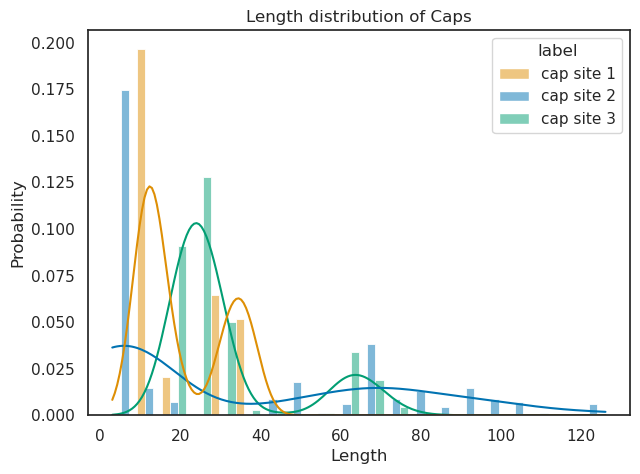

In [73]:
cap_len_dict = {"ids":[],"Length":[],"label":[]}

for row in struct_dict.iterrows():
    _id = row[1]["id"]
    cap1 = row[1]["cap1_length"]
    cap2 = row[1]["cap2_length"]
    cap3 = row[1]["cap3_length"]
    
    cap_len_dict["ids"].append(_id)
    cap_len_dict["Length"].append(cap1)
    cap_len_dict["label"].append("cap site 1")

    cap_len_dict["ids"].append(_id)
    cap_len_dict["Length"].append(cap2)
    cap_len_dict["label"].append("cap site 2")

    cap_len_dict["ids"].append(_id)
    cap_len_dict["Length"].append(cap3)
    cap_len_dict["label"].append("cap site 3")

plt.figure(figsize=[7,5])
# Redifine color palette to conform to heatmap annotations in R script
col = [sns.color_palette("colorblind")[1], sns.color_palette("colorblind")[0], sns.color_palette("colorblind")[2]]

sns.histplot(data=cap_len_dict, x="Length", hue="label", palette = col, multiple = "dodge",  bins = 20, stat = "probability", kde = True)
#sns.violinplot(data=cap_len_dict, x="Length", y="label", bw_adjust = 0.01)
#plt.yscale("log")
plt.title("Length distribution of Caps")
plt.savefig("results/length_of_caps.png")

In [96]:
struct_dict.loc[struct_dict["cap1_length"] == 30]

,id,dist,seq_cluster_label,struct_cluster_label,PC 1,PC 2,special_structure,cap1_length,cap2_length,cap3_length,cap_length_label
11,TanCb2,"[4.736543717774727, 4.480489075928012, 4.53824...",Outliers,Outliers,1.155917,0.976655,TanCb2,30,16,27,Cap at position: 1
39,2813373532,"[5.120413520759813, 6.283794599759094, 6.63439...",Outliers,Outliers,2.062357,2.130039,,30,3,29,Cap at position: 1
40,2813878675,"[4.83812320811795, 4.589299187049162, 4.675446...",Outliers,8,1.142344,1.562059,,30,3,28,Cap at position: 1
179,646037829,"[4.991506761233727, 4.5516956792004875, 4.6826...",Outliers,Outliers,2.295165,0.814853,,30,16,28,Cap at position: 1
210,2810452938,"[4.687160930172885, 4.416211677264408, 4.50769...",Outliers,8,0.932311,1.196068,,30,3,29,Cap at position: 1
213,2815614087,"[4.956243128043698, 4.552820078469732, 4.69026...",Outliers,Outliers,2.356280,0.751925,,30,16,28,Cap at position: 1
214,2832934002,"[4.990024828233412, 4.639482385586663, 4.82602...",8,8,0.956538,1.511361,,30,3,27,Cap at position: 1
217,2844122133,"[5.0060926274643585, 4.5668053922682095, 4.733...",Outliers,Outliers,2.267882,0.872792,,30,16,28,Cap at position: 1
220,2885675413,"[4.707380614288011, 4.4980136883432955, 4.6054...",Outliers,7,1.243385,0.971172,,30,3,28,Cap at position: 1
221,2915416054,"[5.079200449305084, 4.56113655581609, 4.723347...",Outliers,Outliers,2.311735,0.847742,,30,16,28,Cap at position: 1


In [61]:
df_col = {"D": list(np.array([230,230, 10])/255),
          "E": list(np.array([230,230, 10])/255),
          "C": list(np.array([230,230,  0])/255),
          "M": list(np.array([230,230,  0])/255),
          "K": list(np.array([ 20, 90,255])/255),
          "R": list(np.array([ 20, 90,255])/255),
          "S": list(np.array([250,150,  0])/255),
          "T": list(np.array([250,150,  0])/255),
          "F": list(np.array([ 50, 50,170])/255), 
          "Y": list(np.array([ 50, 50,170])/255),
          
          "N": list(np.array([  0,220,220])/255),
          "Q": list(np.array([  0,220,220])/255),
          "G": list(np.array([200,200,200])/255),  # [235,235,235]
          "L": list(np.array([ 15,130, 15])/255),
          "V":  list(np.array([15,130, 15])/255),
          "I":  list(np.array([15,130, 15])/255),
          "A": list(np.array([160,160,160])/255),
          "W": list(np.array([180, 90,180])/255),
          "H": list(np.array([130,130,210])/255),
          "P": list(np.array([220,150,130])/255),
          "X": list(np.array([190,160,110])/255)}
def plotRegions(df, title, start, end):
   # plt.figure(figsize=[20,5])
    lm.Logo(df[start:end], figsize=[(end-start)/2,5], color_scheme = df_col)
    plt.title(f'Profile of cap {title}')
    plt.ylabel('Information (Bits)')
    #plt.ylabel('Probability')
    plt.xlabel('Position')
    plt.savefig(f"results/{title}_pattern.png")
    return 0

0

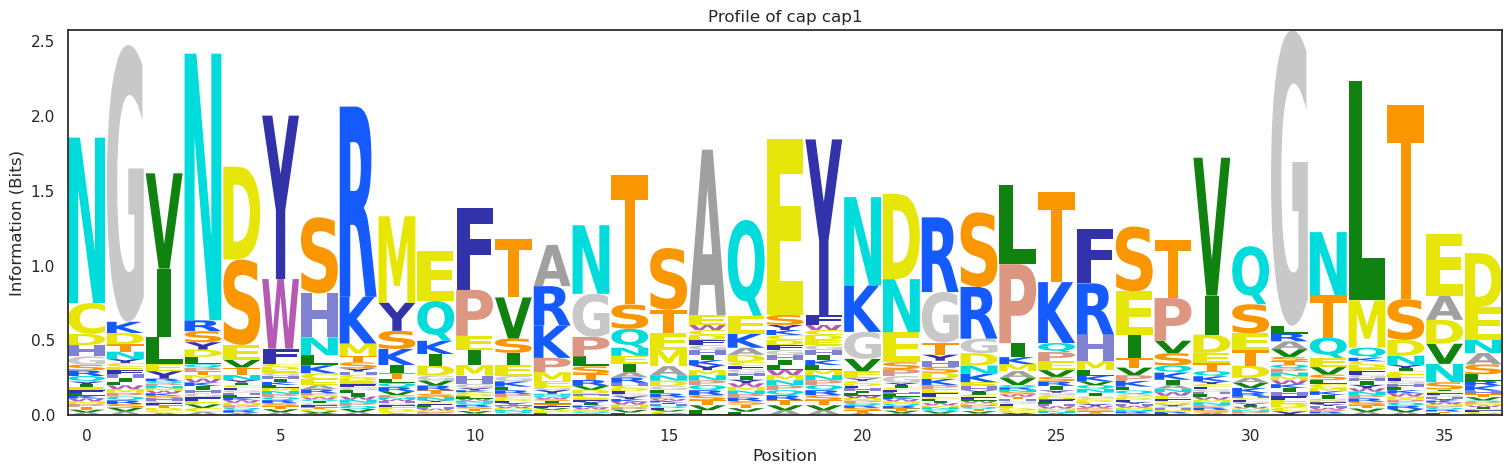

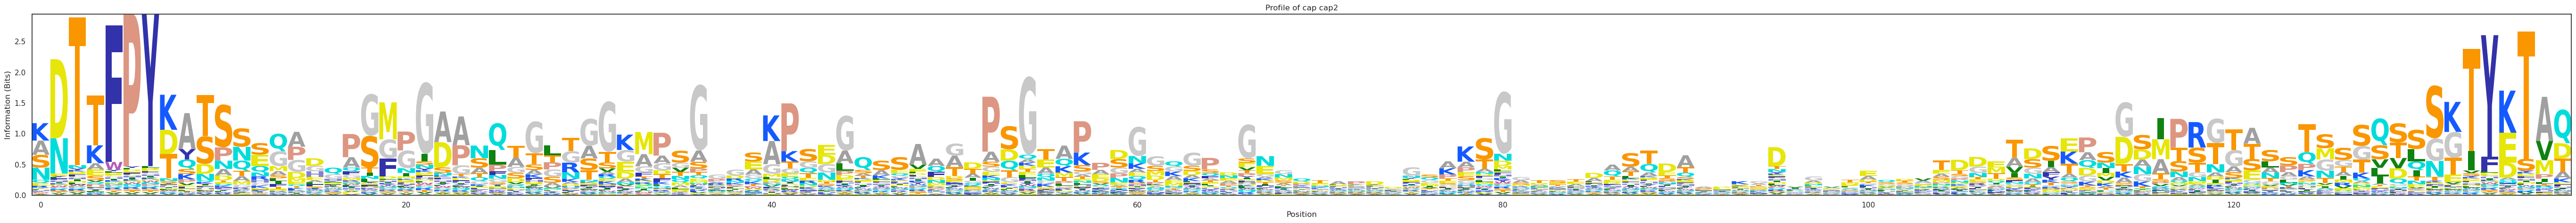

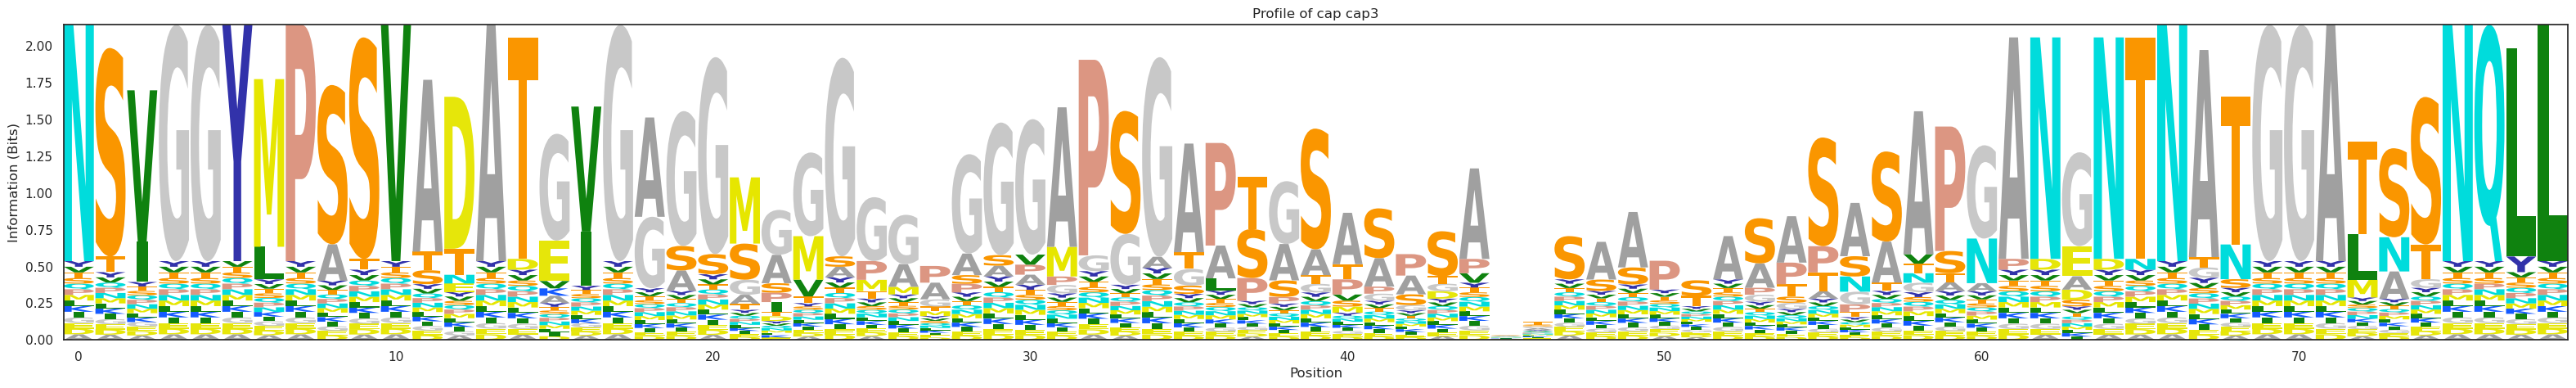

In [62]:
## Save fastas (aligned) of of caps
import matplotlib.pyplot as plt
import logomaker as lm

%matplotlib inline
plt.ion()

DIR_ALIGNED_CAP = "results/sub_sequence_ali/"

df_ali = {"cap1":[], "cap2":[], "cap3":[]}

for cap in ["cap1", "cap2", "cap3"]:
    #with open(f"{DIR_ALIGNED_CAP}{cap}.ali", "w"): 
    for rec in alignment_dict.items():
        
        _id = rec[0]
        seq = rec[1]
        
        
        label = struct_dict.loc[struct_dict["id"] == _id]["cap_length_label"].values[0].split()[-1]
        if f"cap{label}" == cap:
            start = cap_alignment_idx[cap]["start"]
            end   = cap_alignment_idx[cap]["end"]
            df_ali[cap].append(seq[start:end])
            #print(_id, label,  start, end, seq[start:end])
                
ww_counts_df = lm.alignment_to_matrix(sequences=df_ali["cap1"], to_type='information', characters_to_ignore='.-X')
plotRegions(ww_counts_df, "cap1", 0, cap_alignment_idx["cap1"]["end"]-cap_alignment_idx["cap1"]["start"])

ww_counts_df = lm.alignment_to_matrix(sequences=df_ali["cap2"], to_type='information', characters_to_ignore='-')
plotRegions(ww_counts_df, "cap2", 0, cap_alignment_idx["cap2"]["end"]-cap_alignment_idx["cap2"]["start"])


ww_counts_df = lm.alignment_to_matrix(sequences=df_ali["cap3"], to_type='information', characters_to_ignore='.-X')
plotRegions(ww_counts_df, "cap3", 0, cap_alignment_idx["cap3"]["end"]-cap_alignment_idx["cap3"]["start"])

## Saving global structure clusters

Saving csv file with annotations

In [87]:

struct_dict[["id", "seq_cluster_label", "struct_cluster_label", "special_structure", "cap_length_label"]].to_csv("results/global_cluster_data_plddt70_23_10_29_all.csv")

Saving representative structures for each cluster

In [84]:
dst = "data/structures/samples_sequence_23_08_08/"
src = "data/structures/ranked_0/"
import shutil

#shutil.copyfile(src, dst)


sample_structures = []
for i in [ 0, 1, 2, 3, 4, 5, 6]:
    structs = struct_dict.loc[struct_dict["struct_cluster_label"]==i].sample(4)["id"].values
    sample_structures.append(structs)
    print(structs)
    for s in structs:
        print(s)
        if not os.path.isdir(f"{dst}/Cluster_{i+1}"):
            os.mkdir(f"{dst}/Cluster_{i+1}")
        shutil.copyfile(f"{src}/{s}.pdb", f"{dst}/Cluster_{i+1}/{s}.pdb")
print(sample_structures)

['2526247906' '2800836454' '2910157584' '2800635855']
2526247906
2800836454
2910157584
2800635855
['2800264098' 'TanALp' '644252663' '2800727165']
2800264098
TanALp
644252663
2800727165
['2786651172' '2859127800' '2885675413' '2810452938']
2786651172
2859127800
2885675413
2810452938
['648819057' 'TanBSg' '2608983103' '2608465151']
648819057
TanBSg
2608983103
2608465151
[array(['2526247906', '2800836454', '2910157584', '2800635855'],
      dtype=object), array(['2800264098', 'TanALp', '644252663', '2800727165'], dtype=object), array(['2786651172', '2859127800', '2885675413', '2810452938'],
      dtype=object), array(['648819057', 'TanBSg', '2608983103', '2608465151'], dtype=object)]


Saving all structures in directories for each individual cluster

In [253]:
dst = "results/structure_samples_struct_23_08_18/"
src = "data/structures/ranked_0/"
import shutil

col = "struct_cluster_label"

if not os.path.isdir(f"{dst}"):
    os.mkdir(f"{dst}")

sample_structures = []
for i in struct_dict[col].unique():
    structs = struct_dict.loc[struct_dict[col]==i]["id"].values
    sample_structures.append(structs)
    print(structs)
    for s in structs:
        print(s)
        if not os.path.isdir(f"{dst}/Cluster_{i}"):
            os.mkdir(f"{dst}/Cluster_{i}")
        shutil.copyfile(f"{src}/{s}.pdb", f"{dst}/Cluster_{i}/{s}.pdb")
print(sample_structures)

['TanAAp' '644252663' '2541461213' '2608461850' '2654356166' '2725337609'
 '2790741903' '2800836454' '2834105888' '2837623044' '2840801686'
 '2846498488' '2846501797' '2866956199' '2911594683']
TanAAp
644252663
2541461213
2608461850
2654356166
2725337609
2790741903
2800836454
2834105888
2837623044
2840801686
2846498488
2846501797
2866956199
2911594683
['TanALp' 'TanCb1' '2518419131' '2518695199' '2518712047' '2563232424'
 '2586993216' '2629350457' '2630154569' '2631622569' '2641118398'
 '2661929472' '2663801603' '2697184229' '2733488751' '2743529465'
 '2745152095' '2745546911' '2771870499' '2774734325' '2812824980'
 '2812990800' '2851424282' '2882241440' '2900922251' '2907612462'
 '2916502694' '2925440118' '2734583469']
TanALp
TanCb1
2518419131
2518695199
2518712047
2563232424
2586993216
2629350457
2630154569
2631622569
2641118398
2661929472
2663801603
2697184229
2733488751
2743529465
2745152095
2745546911
2771870499
2774734325
2812824980
2812990800
2851424282
2882241440
2900922251
290

## Hirarchical clustering of structure distances

See r script for correct HC 

/home/sandra/anaconda3/envs/protein_metrics/lib/python3.9/site-packages/seaborn/matrix.py:654: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/home/sandra/anaconda3/envs/protein_metrics/lib/python3.9/site-packages/seaborn/matrix.py:624: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


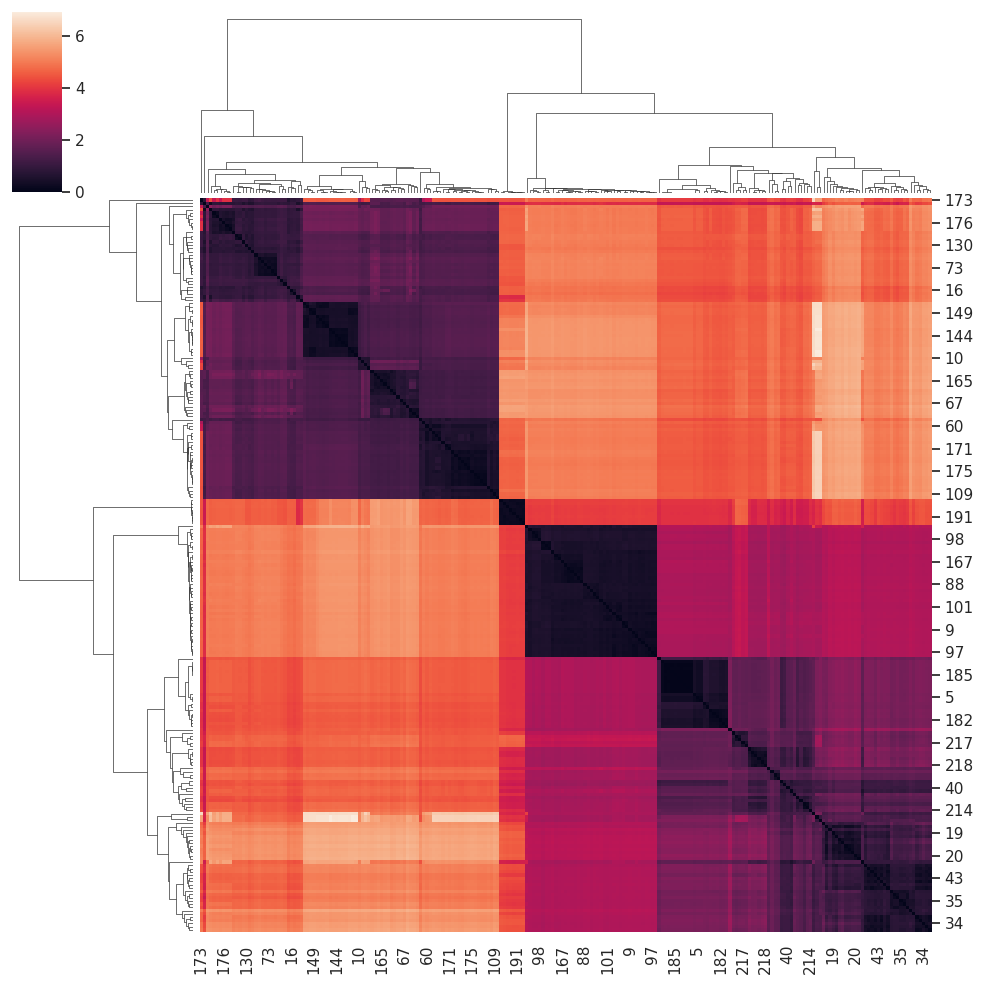

In [266]:
df = struct_dict[["id", "dist"]]
df_2 =  pd.DataFrame(df['dist'].to_list(), columns=df.index.values.tolist())
df_2["id"]=df.index.values.tolist()

#row_linkage, col_linkage = (hc.linkage(sp.distance.pdist(x), method='single')
#  for x in (df_2.values[:,:-1], df_2.values[:,:-1].T))

#row_linkage = hc.linkage((df_2.values[:,:-1], df_2.values[:,:-1].T), method='single')
 # for x in df_2.values[:,:-1])
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df_2.values[:,:-1])#, row_linkage=row_linkage, col_linkage=col_linkage, standard_scale=1)
#sns.clustermap(df_tmp)
#plt.show()
# Normalize
#sns.clustermap(df, z_score=1)
#plt.show()

In [268]:
#df["name"] = df["id"].apply(lambda x: x.split(".")[0])
df_2.pop("id")#.reset_index(drop=True, inplace = True) 
df_2.columns = df["id"].to_list()
df_2["idx"] = df["id"].to_list()
df_2.set_index("idx", inplace=True)
df_2.to_csv("results/global_dist_data_23_08_13.csv",float_format='%.8f')

## Local structure alignment

In [51]:

# Load Global structure_alignment_df

with open("cap_structure_alignment_tanase_23_08_04.pkl", "rb") as f:
    dict_structure_dist = pickle.load(f)

# Small_cap_domain



with open("seq_dist_Needle_23_08_03.pkl", "rb") as file_writer: 
    seq_dict = pickle.load(file_writer)
  

In [91]:
struct_dict[["id", "seq_cluster_label", "struct_cluster_label"]].to_csv("cap_cluster_data.csv")

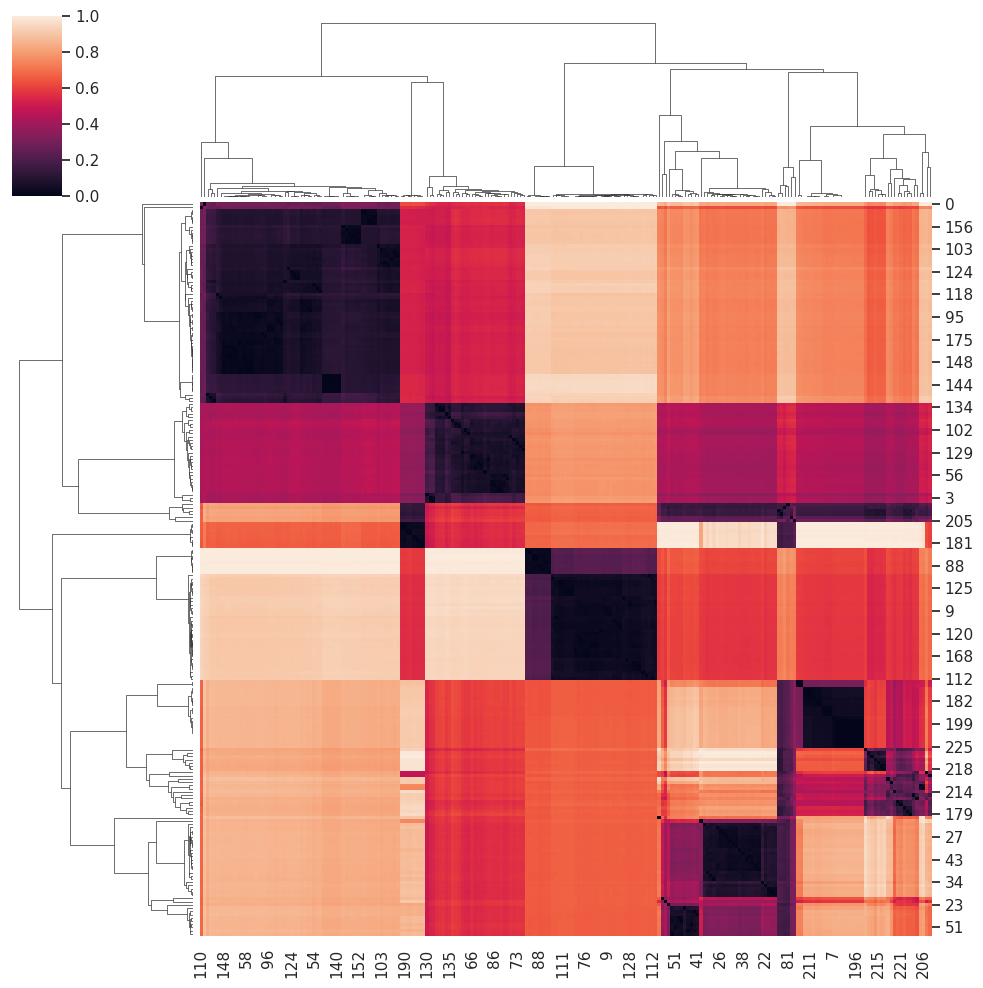

In [56]:
df = struct_dict[["id", "dist"]]
df_2 =  pd.DataFrame(df['dist'].to_list(), columns=df.index.values.tolist())
df_2["id"]=df.index.values.tolist()
# Standardize or Normalize every column in the figure
# Standardize:
sns.clustermap(df_2.values[:,:-1], standard_scale=1)
#plt.show()
# Normalize
#sns.clustermap(df, z_score=1)
#plt.show()

In [92]:
df["name"] = df["id"].apply(lambda x: x.split(".")[0])

df_2.pop("id")#.reset_index(drop=True, inplace = True) 
df_2.columns = df["name"].to_list()
df_2["idx"] = df["name"].to_list()
df_2.set_index("idx", inplace=True)
df_2.to_csv("cap_dist_data_.csv",float_format='%.8f')

# Alignment of Active triad

In [150]:

# Load Global structure_alignment_df

with open("structure_ali_active_site.pkl", "rb") as f:
    dict_structure_dist = pickle.load(f)

# Small_cap_domain



with open("seq_dist.pkl", "rb") as file_writer: 
    seq_dict = pickle.load(file_writer)
  

FileNotFoundError: [Errno 2] No such file or directory: 'seq_dist.pkl'